### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)

In [1]:
import pandas as pd

BASE = "../datasets/HR-Employee-Attrition.csv"

df = pd.read_csv(BASE)


# Limpando a base de colunas com valores não variam e removendo a
# coluna de identificação (EmployeeNumber)

df = df.drop("EmployeeNumber", axis=1)

for c in df.columns:
    column = df[c]
    if (column.nunique() <= 1):
        print(f"Removendo coluna {c}") 
        df = df.drop(c, axis=1)


# Separando nossas colunas por variáveis categóricas ordenadas e 
# não ordernadas


# Colunas que são categóricas e não ordenadas
columns_categorical_not_ordered = [
    'BusinessTravel',
    'Department',
    'EducationField',
    'Gender',
    'JobRole',
    'MaritalStatus',
    'OverTime'
]

# Colunas que são categóricas e ordernadas
columns_categorical_ordered = [
    'Education',
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'JobInvolvement',
    'JobLevel',
    'PerformanceRating',
    'RelationshipSatisfaction',
    'StockOptionLevel',
    'WorkLifeBalance',
    'JobInvolvement'
]

target_column = ['Attrition']


numeric_columns = [
    column
    for column in df.columns
    if column not in (columns_categorical_ordered + columns_categorical_not_ordered + target_column)
]


# Convertendo nossas colunas não ordernadas para o tipo category
### Preparativos do Dataset (remoção de colunas sem variação de valores e categorizando as colunas ordenadas e não ordenadas)
for column in columns_categorical_not_ordered:
    df[column] = df[column].astype("category")

Removendo coluna EmployeeCount
Removendo coluna Over18
Removendo coluna StandardHours


### Visualizando boxplots através de dados agrupados

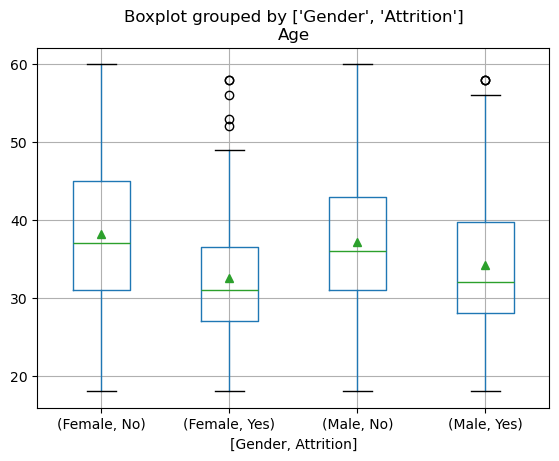

In [9]:
df.boxplot(column="Age", by=["Gender", "Attrition"],  showmeans=True);

#### O que podemos concluir do gráfico acima? 

A média de idade das mulheres que saíram da empresa é menor que a dos homens, é possível verificarmos até mesmo que casos de mulheres mais velhas são considerados **outliers**.

O Q3 de idade de mulheres que permanecem na empresa é um pouco maior que a dos homens.

Em todos os casos, seja homem ou mulher, esteja na empresa ou não, todos os grupos tem a mesma idade mínima (18 anos).

A idade das pessoas que saem da empresa é consideravelmente menor que a idade das pessoas que permanecem.

### Visualizando a relação de idade com nível de senioridade

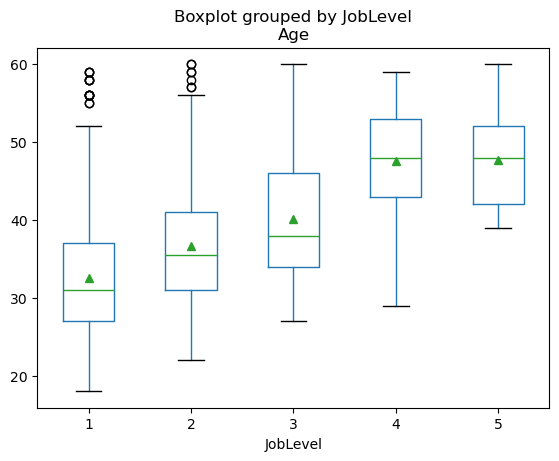

In [43]:
df.boxplot(column="Age", by="JobLevel", grid=False,  showmeans=True);

#### O que podemos concluir do gráfico acima? 

A idade mínima das pessoas que tem o maior nível de senioridade é de pouco menos que 40 anos.

É mais provavel encontrarmos pessoas mais velhas em cargos de menor senioridade, do que pessoas mais novas em cargos de maior senioridade. 

A mediana das pessoas que trabalham no nível de maior senioridade é a mesma das pessoas que trabalham no nível 4.